In [42]:
import pandas as pd

rl_file="Data/linear regression/traintest.csv"
data=pd.read_csv(rl_file).dropna()
data.describe()

,x,y
count,999.000000,999.000000
mean,50.291291,50.319804
std,28.808925,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,74.500000,74.475252
max,100.000000,108.871618


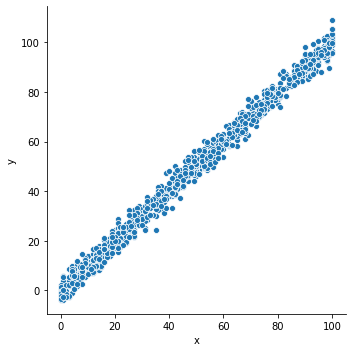

In [43]:
import seaborn as sns

sns.relplot(data=data,x="x",y="y")

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X=data["x"].values.reshape(-1,1)
y=data["y"].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


regr=LinearRegression()
regr.fit(X_train,y_train)

y_pred=regr.predict(X_test)

comparacion=pd.DataFrame({"test":y_test.flatten(),"pred":y_pred.flatten()})

comparacion.describe()


,test,pred
count,250.000000,250.000000
mean,48.823604,49.064709
std,30.383656,30.086038
min,-3.467884,-0.069916
25%,21.239711,21.999536
50%,47.714278,48.081616
75%,74.487306,75.166852
max,105.450379,100.245775


In [49]:
from sklearn.preprocessing import StandardScaler

scaler_std=StandardScaler()

X_train_std=scaler_std.fit_transform(X_train)

regr.fit(X_train_std,y_train)

X_test_std=scaler_std.transform(X_test)
y_pred_std=regr.predict(X_test_std)

comparacion=pd.DataFrame({"test":y_test.flatten(),"pred":y_pred_std.flatten()})
comparacion.describe()



,test,pred
count,250.000000,250.000000
mean,48.823604,49.064709
std,30.383656,30.086038
min,-3.467884,-0.069916
25%,21.239711,21.999536
50%,47.714278,48.081616
75%,74.487306,75.166852
max,105.450379,100.245775


In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax=MinMaxScaler()

X_train_mm=scaler_minmax.fit_transform(X_train)

regr.fit(X_train_mm,y_train)

X_test_mm=scaler_minmax.transform(X_test)
y_pred_mm=regr.predict(X_test_mm)

comparacion=pd.DataFrame({"test":y_test.flatten(),"pred":y_pred_mm.flatten()})
comparacion.describe()

,test,pred
count,250.000000,250.000000
mean,48.823604,49.064709
std,30.383656,30.086038
min,-3.467884,-0.069916
25%,21.239711,21.999536
50%,47.714278,48.081616
75%,74.487306,75.166852
max,105.450379,100.245775


In [51]:
from sklearn import metrics

print("MSE sin normalizar: "+str(metrics.mean_squared_error(y_test, y_pred)))
print("MSE normalizado STD: "+str(metrics.mean_squared_error(y_test, y_pred_std)))
print("MSE normalizado MM: "+str(metrics.mean_squared_error(y_test, y_pred_mm)))

MSE sin normalizar: 8.038475604080109
MSE normalizado STD: 8.038475604080112
MSE normalizado MM: 8.038475604080105


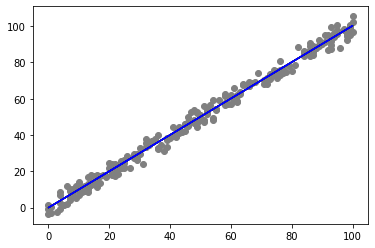

In [58]:
import matplotlib.pyplot as plt

plt.scatter(X_test,y_test,color="grey")
plt.plot(X_test,y_pred,color="red")
plt.plot(X_test,y_pred_std,color="green")
plt.plot(X_test,y_pred_mm,color="blue")
